# Gross profit


In [19]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

/Users/martin.molinero/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
rev_m = 170
rev_stdev = 20
iterations = 1000

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([150.93581199, 171.60147507, 212.7684211 , 186.718221  ,
       200.1975106 , 149.86961892, 175.76741209, 171.65121804,
       169.83192715, 150.23161624, 132.03498995, 191.47596106,
       159.48874373, 171.91655046, 164.68586883, 167.77039322,
       156.03270285, 170.70995613, 192.88111219, 171.22918824,
       165.40285163, 165.48799999, 207.89618089, 140.17179318,
       162.19563377, 173.71205876, 161.36398792, 155.43280747,
       142.85975933, 175.5529861 , 125.4845745 , 161.35113256,
       161.06895979, 176.30626466, 179.07370268, 204.85086359,
       141.35346809, 137.76110169, 180.04118896, 170.37464776,
       182.2280957 , 158.65886731, 155.3921204 , 169.1463417 ,
       146.13450395, 155.47236196, 187.99951876, 184.35169313,
       166.87805275, 189.27058272, 137.7918268 , 198.87684559,
       224.43849292, 177.11108919, 154.08595387, 165.10975352,
       140.8671885 , 171.81659162, 196.63170636, 146.8593465 ,
       155.12184384, 154.1103155 , 192.29714431, 166.06

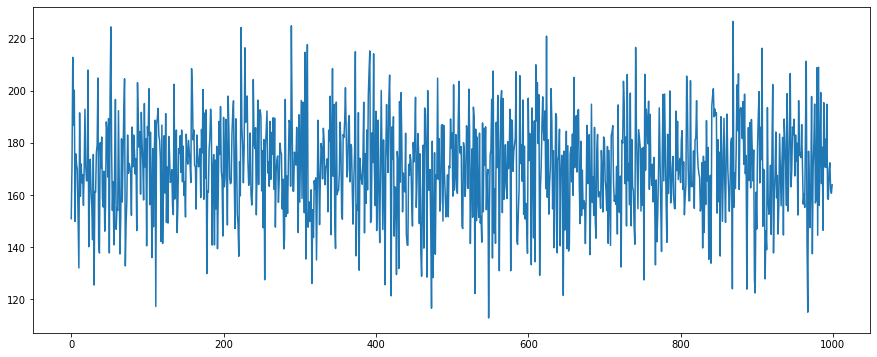

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

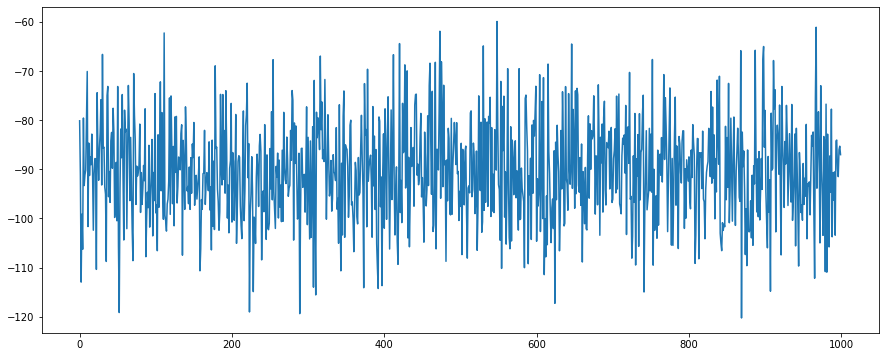

In [5]:
COGS = -(rev* np.random.normal(0.6, 0.1))
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-90.43898021453604

In [7]:
COGS.std()

10.201459335070552

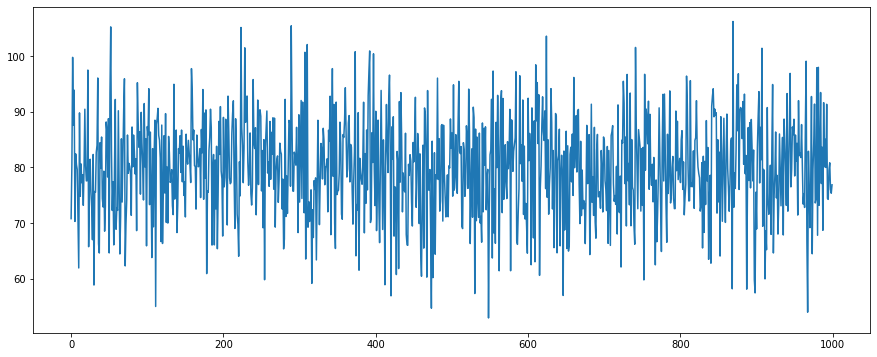

In [9]:
gross_profit = rev + COGS
gross_profit

plt.figure(figsize=(15,6))
plt.plot(gross_profit)
plt.show()

In [10]:
max(gross_profit)

106.25797386572675

In [11]:
min(gross_profit)

52.94290375863173

In [12]:
gross_profit.mean()

79.90790297743048

In [13]:
gross_profit.std()

9.013560533757529

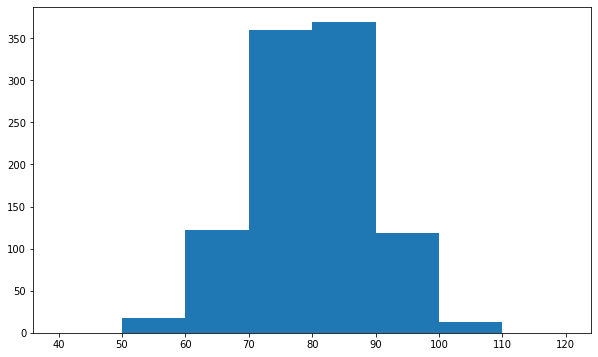

In [16]:
plt.figure(figsize=(10,6))
plt.hist(gross_profit, bins=[40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.show()

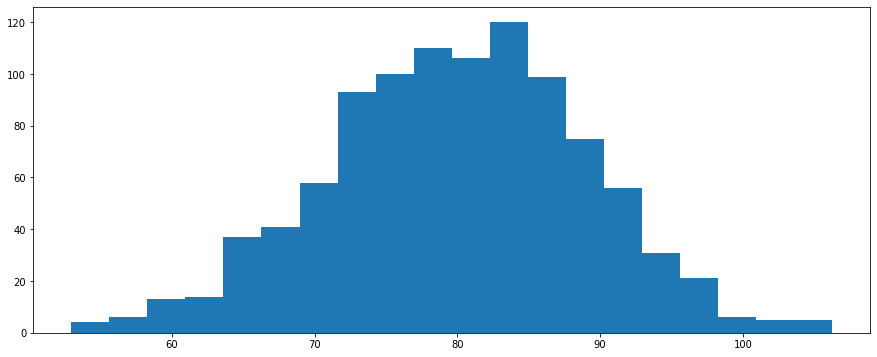

In [18]:
plt.figure(figsize=(15,6))
plt.hist(gross_profit, bins=20)
plt.show()

## stock forecast

In [33]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [34]:
log_returns = np.log(1 + data.pct_change())

In [35]:
log_returns.tail()

,PG
Date,
2020-06-19,-0.003023
2020-06-22,-0.009887
2020-06-23,-0.000170
2020-06-24,-0.011190
2020-06-25,0.012548


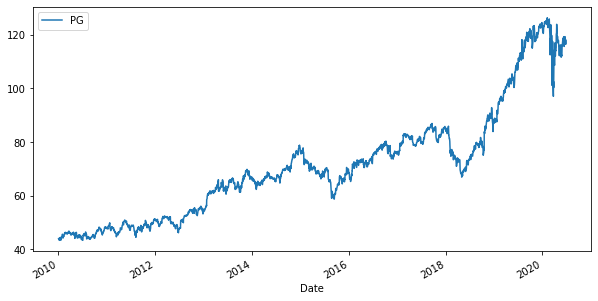

In [36]:
data.plot(figsize=(10,5))

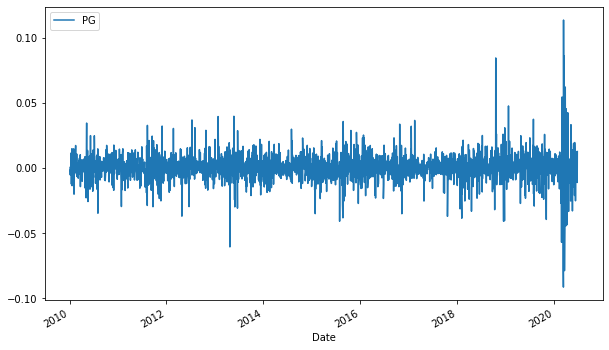

In [37]:
log_returns.plot(figsize=(10,6))

In [38]:
u = log_returns.mean()
u

PG    0.000373
dtype: float64

In [39]:
var = log_returns.var()
var

PG    0.000118
dtype: float64

In [40]:
drift = u - (0.5 * var)
drift

PG    0.000314
dtype: float64

In [42]:
stdev = log_returns.std()
stdev

PG    0.010871
dtype: float64

In [43]:
type(drift)

pandas.core.series.Series

In [44]:
type(stdev)

pandas.core.series.Series

In [45]:
np.array(drift)

array([0.00031419])

In [46]:
drift.values

array([0.00031419])

In [47]:
stdev.values

array([0.01087071])

In [48]:
norm.ppf(0.95)

1.6448536269514722

In [50]:
x = np.random.rand(10,2)
x

array([[0.58263882, 0.59185528],
       [0.44861011, 0.02868951],
       [0.54850698, 0.50367989],
       [0.79641508, 0.74540134],
       [0.90132926, 0.54131593],
       [0.49495523, 0.55193527],
       [0.80933383, 0.47648275],
       [0.42477564, 0.19214431],
       [0.49801372, 0.91409783],
       [0.02632721, 0.05038232]])

In [51]:
norm.ppf(x)

array([[ 0.20864886,  0.23232005],
       [-0.12917368, -1.90041246],
       [ 0.12189011,  0.00922424],
       [ 0.82888439,  0.66008807],
       [ 1.28916285,  0.10374951],
       [-0.01264569,  0.13055233],
       [ 0.87544404, -0.05898318],
       [-0.18969098, -0.87002158],
       [-0.00497889,  1.36642901],
       [-1.93774428, -1.64115791]])

In [52]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-1.15326255,  0.83015328],
       [-1.45628805, -1.04892519],
       [-0.18326985,  1.41950551],
       [ 1.11220744,  0.86167163],
       [-0.44050702, -0.14084077],
       [-1.54830342,  0.03072466],
       [-0.04436075,  0.27312785],
       [-0.56275351, -1.60684256],
       [ 0.54205255,  1.7586918 ],
       [ 1.08593425,  0.99814248]])

In [53]:
t_intervals = 1000
iterations = 10


In [55]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.02463369, 1.01555384, 1.0130364 , ..., 0.99891831, 0.986945  ,
        1.00220204],
       [1.00039838, 1.00743202, 1.00937759, ..., 0.97841624, 0.97422891,
        1.02278354],
       [1.01552366, 0.99150829, 1.00303205, ..., 0.99385085, 0.99926706,
        1.02266295],
       ...,
       [0.98382791, 1.03046674, 1.00835076, ..., 1.00220435, 0.99190694,
        0.98985873],
       [0.99002843, 1.00152795, 0.99852171, ..., 1.0113981 , 0.96481813,
        1.01273089],
       [1.01537803, 1.00952979, 1.0134716 , ..., 1.00809954, 1.00665421,
        0.99610883]])

In [56]:
S0 = data.iloc[0]
S0

PG    44.054558
Name: 2010-01-04 00:00:00, dtype: float64

In [58]:
price_list = np.zeros_like(daily_returns)

In [59]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
price_list[0] = S0
price_list


array([[44.0545578, 44.0545578, 44.0545578, ..., 44.0545578, 44.0545578,
        44.0545578],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [63]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [64]:
 price_list


array([[ 44.0545578 ,  44.0545578 ,  44.0545578 , ...,  44.0545578 ,
         44.0545578 ,  44.0545578 ],
       [ 44.07210838,  44.38197225,  44.46768359, ...,  43.10369482,
         42.91922396,  45.05827674],
       [ 44.7562689 ,  44.00509336,  44.6025117 , ...,  42.83864392,
         42.8877666 ,  46.07943023],
       ...,
       [117.44891487,  63.59197398,  48.44519605, ...,  51.60024593,
         49.54830919,  55.9364683 ],
       [116.27776473,  63.6891396 ,  48.37358013, ...,  52.18839055,
         47.80510681,  56.64858927],
       [118.06588738,  64.29608341,  49.02524965, ...,  52.61109248,
         48.12321188,  56.42815983]])

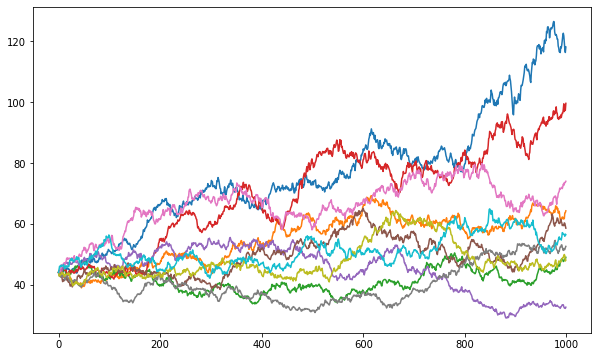

In [65]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

 ## Black Scholes

In [87]:
def d1(S, K, r, stdev, T):
    return (np.log(S/K) + (r + stdev ** 2 / 2) / (stdev * np.sqrt(T)))

In [88]:
def d2(S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev ** 2 / 2) / (stdev * np.sqrt(T)))    

In [70]:
norm.cdf(0)

0.5

In [71]:
norm.cdf(0.25)

0.5987063256829237

In [72]:
norm.cdf(0.75)

0.7733726476231317

In [73]:
norm.cdf(9)

1.0

In [74]:
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T)))- (K* np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [75]:
ticker

'PG'

In [77]:
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2020-1-1')['Adj Close']

In [79]:
res = data.iloc[-1]
res

PG    117.889999
Name: 2020-06-25 00:00:00, dtype: float64

In [80]:
log_returns = np.log(1 + data.pct_change())

In [82]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.439876
dtype: float64

In [83]:
r = 0.025
K = 110.0
T = 1


In [89]:
d1(res, K, r, stdev, T)

PG    0.346044
dtype: float64

In [90]:
d2(res, K, r, stdev, T)

PG   -0.093832
dtype: float64

In [91]:
BSM(res, K, r, stdev, T)

PG    25.26893
Name: 2020-06-25 00:00:00, dtype: float64